Importing

In [1]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [3]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "src/model_architectures.ipynb"

Data loaded


Training

In [4]:
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'CNN':
        model = MRI_CNN
    case 'ResNet':
        model = MRI_ResNet
    case 'ResNet-Pre':
        model = MRI_Pretrained_ResNet
    case 'AlexNet':
        model = MRI_AlexNet
    case _:
        model = MRI_CNN
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [5]:
training_losses = []
validation_losses = []
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_set, val_set = torch.utils.data.random_split(training_set, [1 - val_ratio, val_ratio])
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size,shuffle=True)

    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)
    training_losses.append(train_loss)
    validation_losses.append(val_loss)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:  10%|█         | 1/10 [00:06<01:02,  6.93s/epoch]

Epoch [1/10] Train Loss: 1.4022 Train Accuracy: 30.84% Validation Loss: 1.2480 Validation Accuracy: 39.10%


Training:  20%|██        | 2/10 [00:12<00:48,  6.10s/epoch]

Epoch [2/10] Train Loss: 1.0264 Train Accuracy: 55.65% Validation Loss: 0.8878 Validation Accuracy: 61.71%


Training:  30%|███       | 3/10 [00:17<00:40,  5.83s/epoch]

Epoch [3/10] Train Loss: 0.8006 Train Accuracy: 69.38% Validation Loss: 0.8790 Validation Accuracy: 61.71%


Training:  40%|████      | 4/10 [00:23<00:34,  5.72s/epoch]

Epoch [4/10] Train Loss: 0.6554 Train Accuracy: 73.79% Validation Loss: 0.6039 Validation Accuracy: 75.12%


Training:  50%|█████     | 5/10 [00:29<00:28,  5.65s/epoch]

Epoch [5/10] Train Loss: 0.4886 Train Accuracy: 80.57% Validation Loss: 0.6897 Validation Accuracy: 73.99%


Training:  60%|██████    | 6/10 [00:34<00:22,  5.63s/epoch]

Epoch [6/10] Train Loss: 0.3722 Train Accuracy: 85.79% Validation Loss: 0.3479 Validation Accuracy: 88.37%


Training:  70%|███████   | 7/10 [00:40<00:17,  5.69s/epoch]

Epoch [7/10] Train Loss: 0.3079 Train Accuracy: 89.18% Validation Loss: 0.3767 Validation Accuracy: 85.62%


Training:  80%|████████  | 8/10 [00:46<00:11,  5.72s/epoch]

Epoch [8/10] Train Loss: 0.2135 Train Accuracy: 92.73% Validation Loss: 0.1720 Validation Accuracy: 94.02%


Training:  90%|█████████ | 9/10 [00:51<00:05,  5.73s/epoch]

Epoch [9/10] Train Loss: 0.1357 Train Accuracy: 95.32% Validation Loss: 0.1046 Validation Accuracy: 97.25%


Training: 100%|██████████| 10/10 [00:57<00:00,  5.77s/epoch]

Epoch [10/10] Train Loss: 0.1052 Train Accuracy: 96.29% Validation Loss: 0.1560 Validation Accuracy: 94.99%


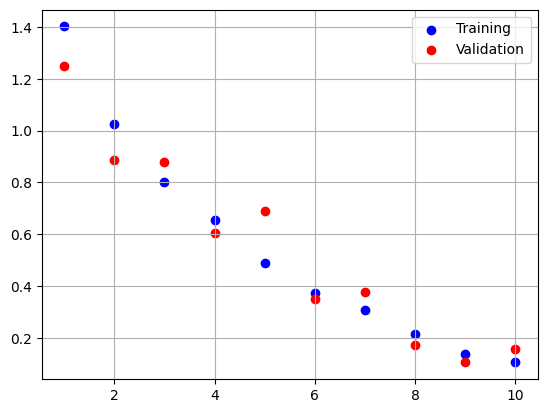

In [6]:
plt.scatter(range(1, len(training_losses)+1), training_losses, c='blue', label='Training')
plt.scatter(range(1, len(validation_losses)+1), validation_losses, c='red', label='Validation')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(5), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:  20%|██        | 1/5 [00:00<00:03,  1.08epoch/s]

Testing Epoch [1/10] Test Loss: 0.8169 Test Accuracy: 79.16% Time per Epoch: 0.92 seconds


Testing:  40%|████      | 2/5 [00:01<00:02,  1.20epoch/s]

Testing Epoch [2/10] Test Loss: 0.8004 Test Accuracy: 79.16% Time per Epoch: 0.77 seconds


Testing:  60%|██████    | 3/5 [00:02<00:01,  1.23epoch/s]

Testing Epoch [3/10] Test Loss: 0.7771 Test Accuracy: 79.16% Time per Epoch: 0.78 seconds


Testing:  80%|████████  | 4/5 [00:03<00:00,  1.26epoch/s]

Testing Epoch [4/10] Test Loss: 0.7577 Test Accuracy: 79.16% Time per Epoch: 0.76 seconds


Testing: 100%|██████████| 5/5 [00:04<00:00,  1.24epoch/s]

Testing Epoch [5/10] Test Loss: 0.7583 Test Accuracy: 79.16% Time per Epoch: 0.78 seconds
Average Test Loss: 0.7821
Average Test Accuracy: 79.16%


Model Classification:

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       543
           1       0.95      0.95      0.95       554
           2       0.94      0.97      0.96       269
           3       0.98      0.99      0.99       492

    accuracy                           0.96      1858
   macro avg       0.96      0.96      0.96      1858
weighted avg       0.96      0.96      0.96      1858

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       172
           1       0.89      0.98      0.93       182
           2       0.96      0.99      0.98        82
           3       1.00      0.93      0.97       183

    accuracy                           0.95       619
   macro avg       0.95      0.95      0.95       619
weighted avg       0.95      0.95      0.95       619

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       186
           1       0.

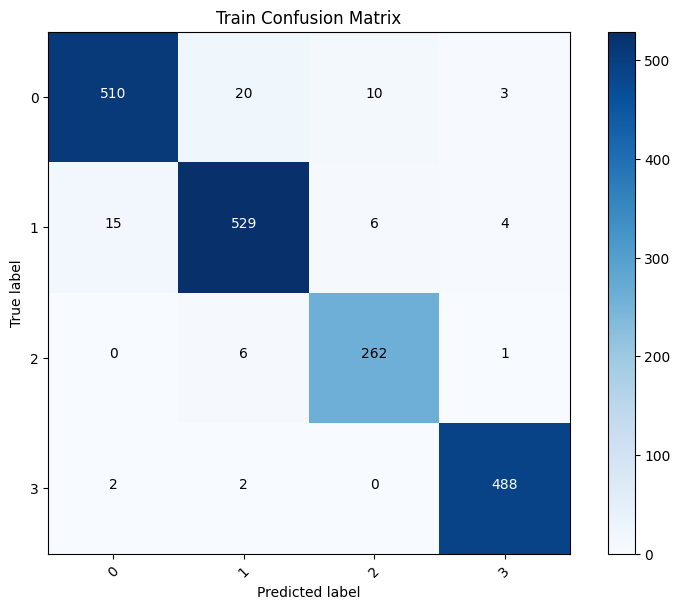

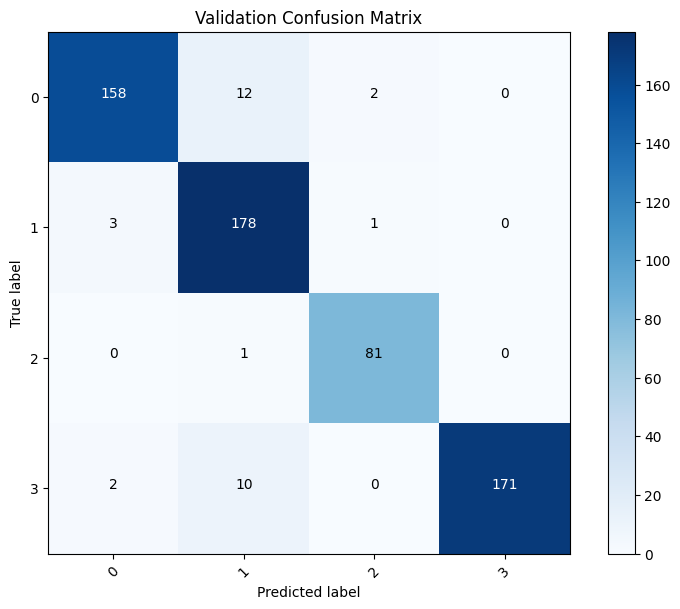

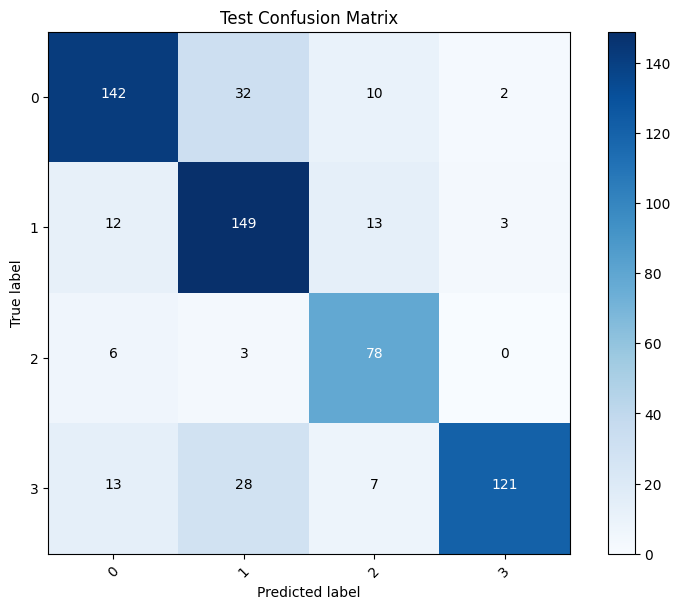

In [8]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()

ROC Curves:

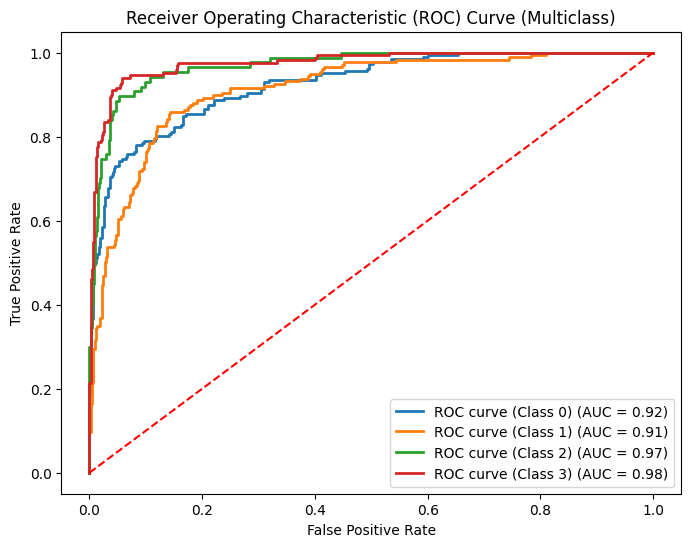

In [9]:
plot_auc_curve_multiclass(model,test_loader,4)